### **DIAMOND DATASET**

In [21]:
# All Import statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [22]:
df = pd.read_csv('diamonds.csv')

drop_col = 'Unnamed: 0'
df.drop(drop_col, axis=1, inplace=True)
df.head()

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200


In [23]:
df.isnull().sum()

cut                            0
color                          0
clarity                        0
carat_weight                   0
cut_quality                    0
lab                            0
symmetry                       0
polish                         0
eye_clean                      0
culet_size                     0
culet_condition                0
depth_percent                  0
table_percent                  0
meas_length                    0
meas_width                     0
meas_depth                     0
girdle_min                     0
girdle_max                     0
fluor_color                    0
fluor_intensity                0
fancy_color_dominant_color     0
fancy_color_secondary_color    0
fancy_color_overtone           0
fancy_color_intensity          0
total_sales_price              0
dtype: int64

In [24]:
# there is only 1 null feature having 1 null value replace it by taking mode

mode_for_total_sales_price = df['total_sales_price'].mode().iloc[0]

df['total_sales_price'].fillna(mode_for_total_sales_price, inplace=True)

In [25]:
df.describe(include='O').T

,count,unique,top,freq
cut,219703,11,Round,158316
color,219703,11,E,33103
clarity,219703,11,SI1,38627
cut_quality,219703,6,Excellent,124861
lab,219703,3,GIA,200434
symmetry,219703,5,Excellent,131619
polish,219703,5,Excellent,175806
eye_clean,219703,5,unknown,156916
culet_size,219703,9,N,131899
culet_condition,219703,4,unknown,204384


In [26]:
df.columns

Index(['cut', 'color', 'clarity', 'carat_weight', 'cut_quality', 'lab',
       'symmetry', 'polish', 'eye_clean', 'culet_size', 'culet_condition',
       'depth_percent', 'table_percent', 'meas_length', 'meas_width',
       'meas_depth', 'girdle_min', 'girdle_max', 'fluor_color',
       'fluor_intensity', 'fancy_color_dominant_color',
       'fancy_color_secondary_color', 'fancy_color_overtone',
       'fancy_color_intensity', 'total_sales_price'],
      dtype='object')

## visulaize

In [27]:
one_carat_diamonds = df.loc[df['carat_weight'].between(.9, 1.2)].reindex()

In [28]:
one_carat_wi_range = one_carat_diamonds.loc[df['total_sales_price'].between(1800, 12000)].reindex()

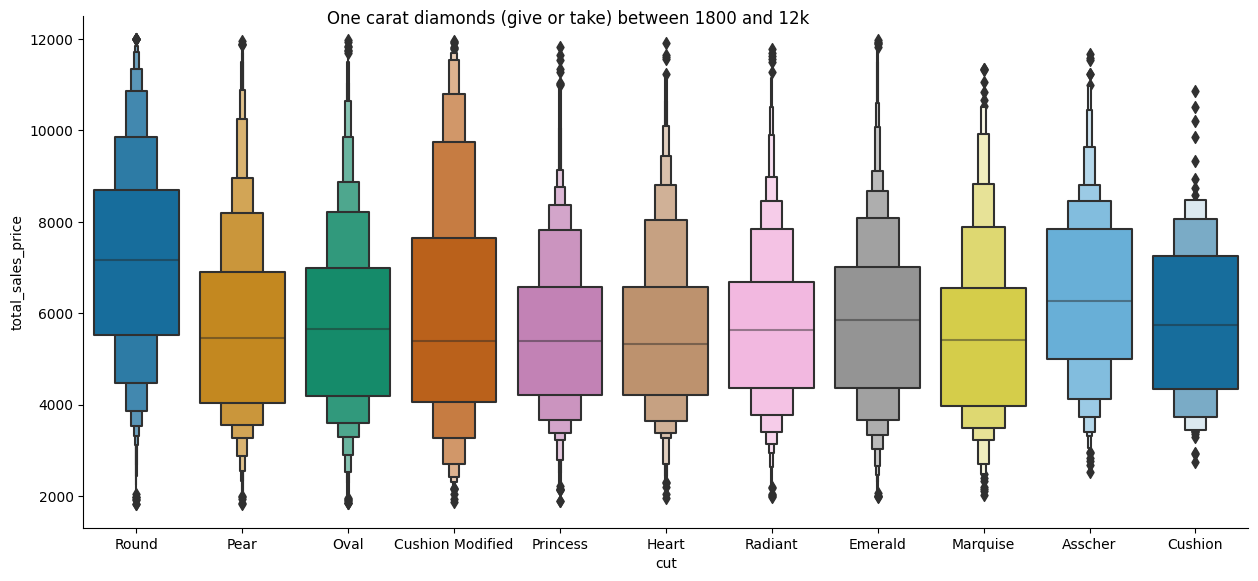

In [29]:
f=sns.catplot(data=one_carat_wi_range, x="cut", y="total_sales_price",
              kind="boxen", color=".9",  palette="colorblind")

f.figure.set_size_inches(15, 6)
f.fig.suptitle('One carat diamonds (give or take) between 1800 and 12k');

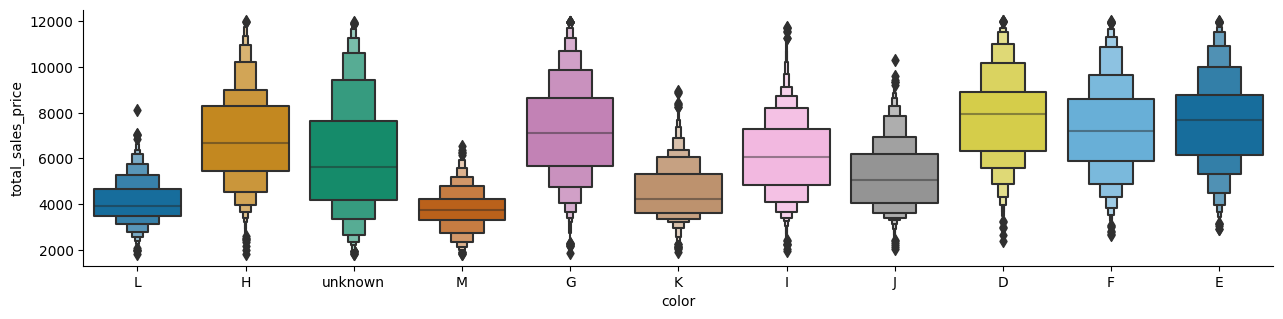

In [30]:
sns.set_palette(palette="light:#edf5dc", n_colors=11)
colors = ['D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'fancy']
f=sns.catplot(data=one_carat_wi_range, x="color", y="total_sales_price",
              kind="boxen",  palette="colorblind")

f.figure.set_size_inches(15, 3)

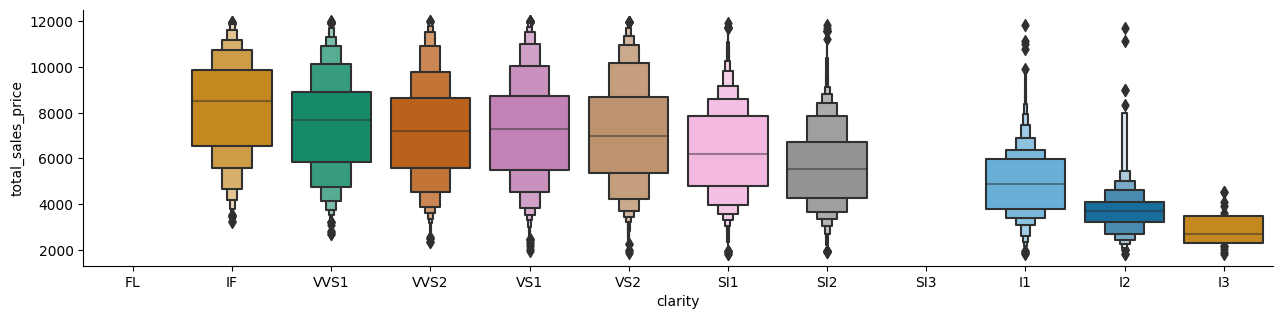

In [31]:
sns.set_palette(palette='colorblind', n_colors=12)
clarities = ['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'SI3', 'I1', 'I2', 'I3']
f=sns.catplot(data=one_carat_wi_range, x="clarity", y="total_sales_price",
              kind="boxen", order=clarities)

f.figure.set_size_inches(15, 3)

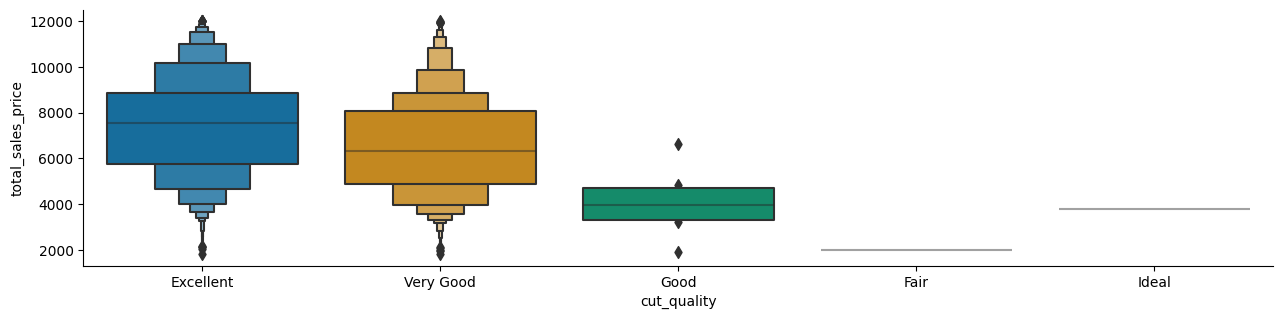

In [32]:
cut_qualities =['Excellent', 'Very Good', 'Good', 'Fair', 'Ideal']
sns.set_palette(palette='colorblind', n_colors=5)
f=sns.catplot(data=one_carat_wi_range, x="cut_quality", y="total_sales_price",
              kind="boxen", order=cut_qualities)

f.figure.set_size_inches(15, 3)

In [33]:
categorical_columns = ['color', 'clarity', 'cut_quality','symmetry', 'polish', 'culet_size', 'girdle_min', 'girdle_max']


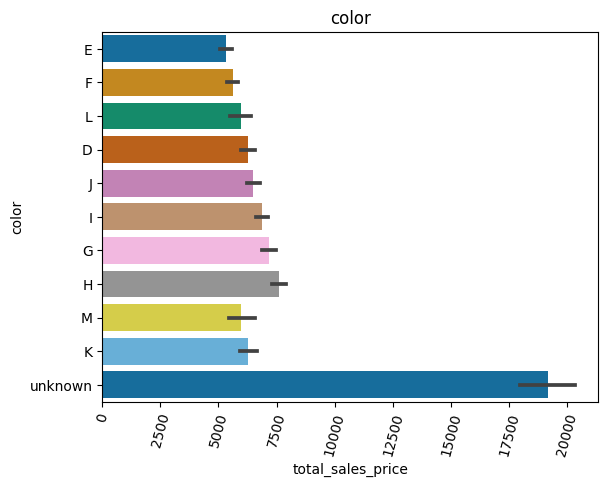

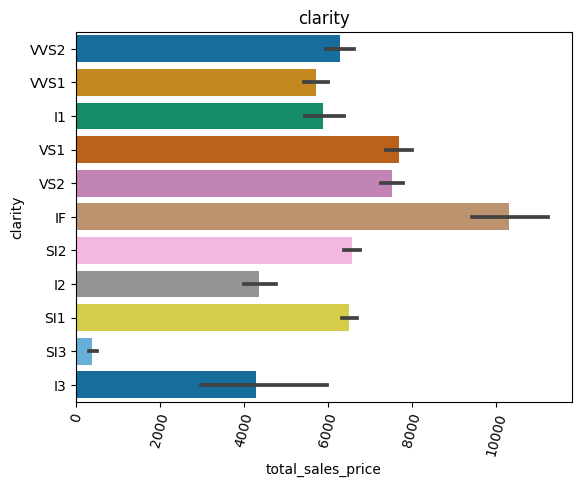

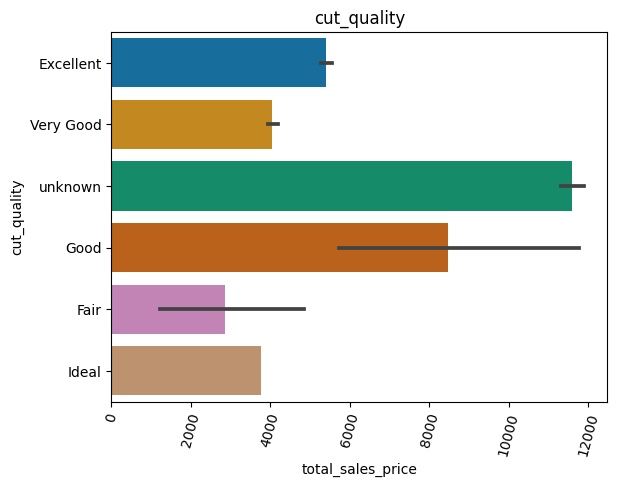

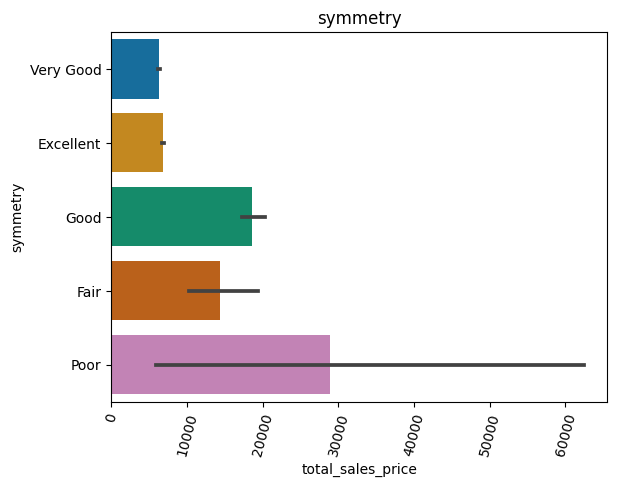

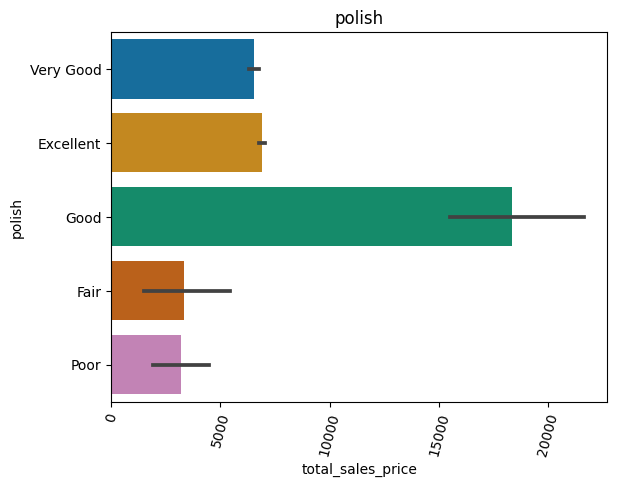

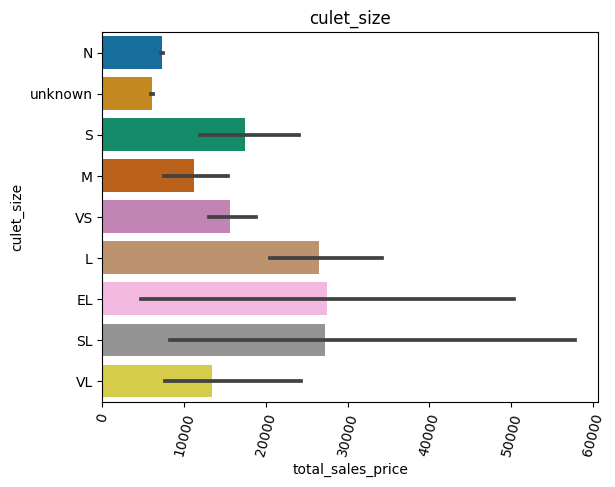

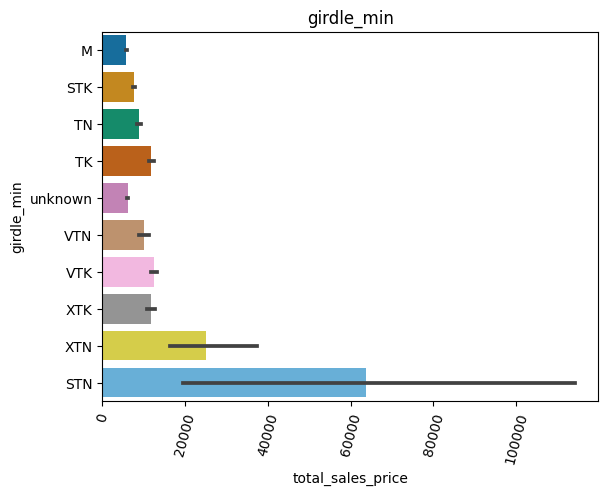

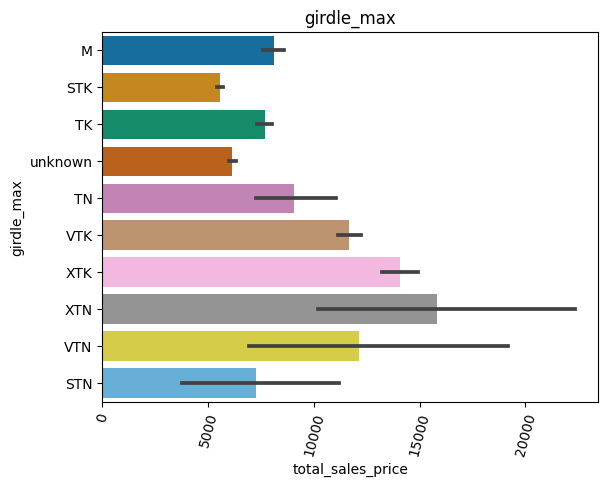

In [34]:
for cat in categorical_columns:
    sns.barplot(df,x='total_sales_price',y=cat,palette="colorblind")
    plt.xticks(rotation=75)
    plt.title(cat)

    plt.show()

In [35]:
numerical_features = ['carat_weight', 'depth_percent', 'table_percent', 'meas_length', 'meas_width', 'meas_depth']

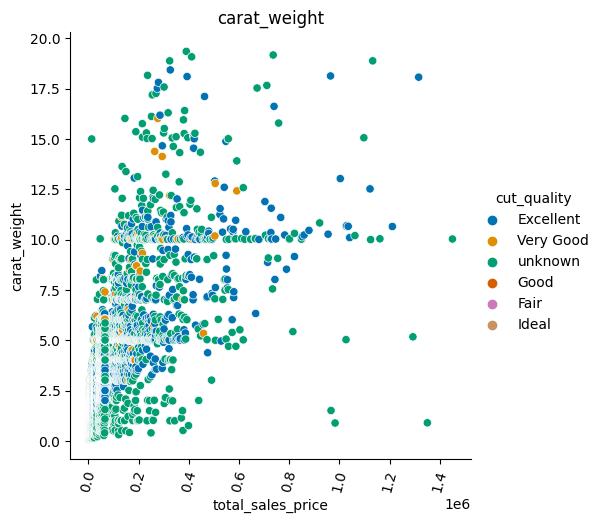

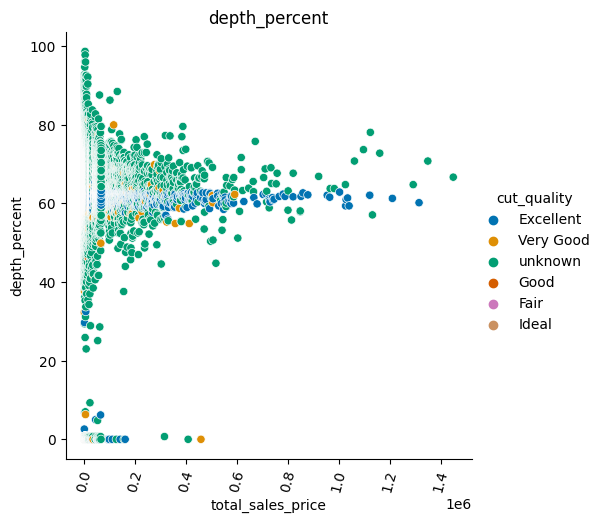

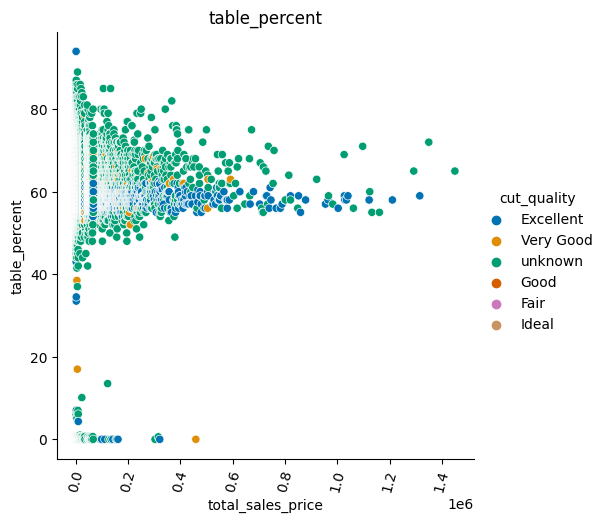

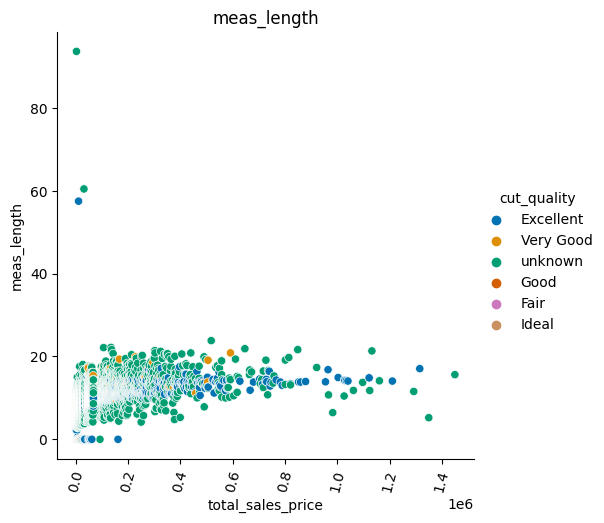

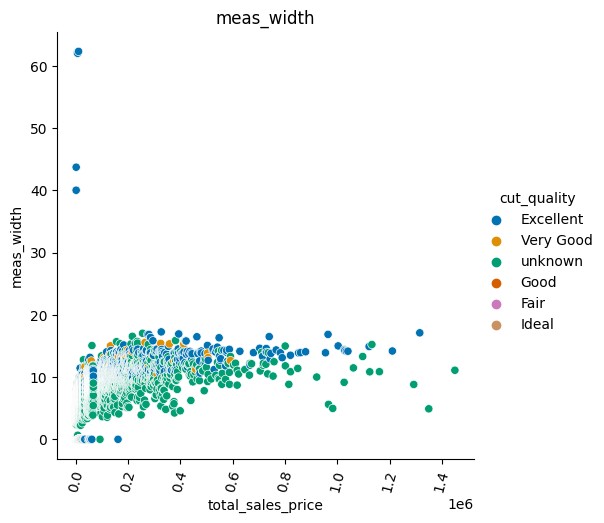

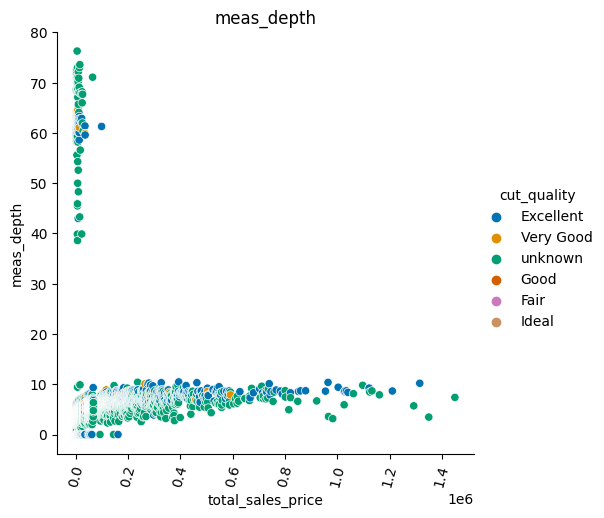

In [36]:
for cat in numerical_features:
    sns.relplot(df,x='total_sales_price',y=cat, hue= 'cut_quality',palette="colorblind" )
    plt.xticks(rotation=75)
    plt.title(cat)

    plt.show()

In [37]:
corr = df.corr(method='pearson')
corr.style.background_gradient(cmap ='coolwarm')

<ipython-input-37-7675ed246d9d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='pearson')


,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
carat_weight,1.000000,0.061724,0.090697,0.782683,0.788912,0.350719,0.745963
depth_percent,0.061724,1.000000,0.673835,0.128791,0.119692,0.086477,0.025408
table_percent,0.090697,0.673835,1.000000,0.165742,0.141250,0.082533,0.045192
meas_length,0.782683,0.128791,0.165742,1.000000,0.788652,0.342209,0.489218
meas_width,0.788912,0.119692,0.141250,0.788652,1.000000,0.412933,0.506403
meas_depth,0.350719,0.086477,0.082533,0.342209,0.412933,1.000000,0.216410
total_sales_price,0.745963,0.025408,0.045192,0.489218,0.506403,0.216410,1.000000


**Feature Selection and scaling**

In [51]:
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor, Lasso, Ridge
from sklearn.svm import SVR
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, learning_curve, RandomizedSearchCV
from sklearn.metrics import r2_score,make_scorer,mean_squared_error

In [53]:
# list of categorical variables
categorical_columns = [feature for feature in df.columns if df[feature].dtypes =='O']
# list of categorical variables
numerical_columns=[feature for feature in df.columns if df[feature].dtypes !='O']
data=df.copy()
std=RobustScaler()
data[numerical_columns]=std.fit_transform(data[numerical_columns])
#using pandas get_dummies encode categorical_columns
data_encoded=pd.get_dummies(data[categorical_columns], prefix=categorical_columns)

In [54]:
data=pd.concat([data[numerical_columns],data_encoded],axis=1)

In [55]:
data.head()

,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price,cut_Asscher,cut_Cushion,cut_Cushion Modified,...,fancy_color_intensity_Faint,fancy_color_intensity_Fancy,fancy_color_intensity_Fancy Dark,fancy_color_intensity_Fancy Deep,fancy_color_intensity_Fancy Intense,fancy_color_intensity_Fancy Light,fancy_color_intensity_Fancy Vivid,fancy_color_intensity_Light,fancy_color_intensity_Very Light,fancy_color_intensity_unknown
0,-0.594203,0.130435,0.333333,-1.105,-1.388489,-1.305263,-0.416569,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.594203,-0.217391,0.333333,-1.110,-1.374101,-1.315789,-0.416569,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.594203,-0.565217,0.333333,-1.090,-1.366906,-1.326316,-0.416569,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.594203,-0.173913,0.333333,-1.100,-1.381295,-1.315789,-0.416569,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.594203,1.086957,0.166667,-1.135,-1.417266,-1.273684,-0.416569,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [56]:
X=data
y=df['total_sales_price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=14)
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(131821, 154)

(87882, 154)

(131821,)

(87882,)

In [63]:
models = [SGDRegressor(alpha=0.01, max_iter=10000), Lasso(), Ridge()]
for model in models:
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    print("model: {}".format(model))
    mse = mean_squared_error(y_test, ypred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, ypred)
    print("\tR2 Score:", r2)
    print("\tMSE:",mse)
    print("\tRMSE:", rmse)

model: SGDRegressor(alpha=0.01, max_iter=10000)
	R2 Score: 0.9999959624544129
	MSE: 2688.8125334068955
	RMSE: 51.853761034344416
model: Lasso()
	R2 Score: 0.9999999999608618
	MSE: 0.026064241063541004
	RMSE: 0.16144423515115366
model: Ridge()
	R2 Score: 0.999999999999886
	MSE: 7.590080265790407e-05
	RMSE: 0.008712106671632532
